In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Input data
protein_concentrations = np.array([
0,
0.05,
0.1,
0.2,
0.3,
0.4,
0.5
]).reshape(-1, 1)

replicates = np.array([
    [0.2415, 0.2397, 0.2438],
    [0.3001, 0.3018, 0.3079],
    [0.2397, 0.2563, 0.3079],
    [0.5137, 0.5195, 0.5246],
    [0.5923, 0.586, 0.5856],
    [0.7045, 0.6926, 0.6832],
    [0.7774, 0.7897, 0.8102]
])

# Step 1: Average the replicates
averaged_values = np.mean(replicates, axis=1)

# Step 2: Perform linear regression
model = LinearRegression()
model.fit(protein_concentrations, averaged_values)

# Step 3: Calculate R^2
r_squared = model.score(protein_concentrations, averaged_values)

# Output the results
print(f"Averaged values: {averaged_values}")
print(f"R^2 value: {r_squared}")

Averaged values: [0.24166667 0.30326667 0.26796667 0.51926667 0.58796667 0.69343333
 0.79243333]
R^2 value: 0.9649240903380114


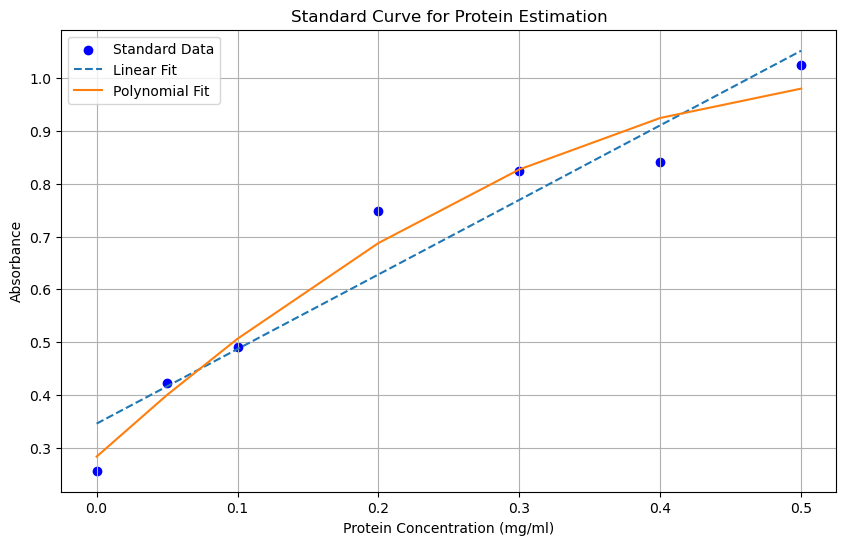

Estimated Protein Concentrations (Linear Fit): [0.07501648 0.13552575 0.16738391 0.07867156 0.09315039 0.13613886
 0.17092108]
Estimated Protein Concentrations (Polynomial Fit): [0.07364509 0.11543346 0.13901395 0.0760715  0.08579963 0.11587603
 0.14170983]
Mean Protein Concentration (Linear Fit): 0.1224 ± 0.0403 mg/ml
Mean Protein Concentration (Polynomial Fit): 0.1068 ± 0.0286 mg/ml


In [7]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Provided data
albumin_cntl_replicates = np.array([
    [0.2504, 0.2578, 0.2604],
    [0.4382, 0.4314, 0.3999],
    [0.4887, 0.4913, 0.4926],
    [0.7647, 0.7545, 0.725],
    [0.8183, 0.8195, 0.8328],
    [0.8543, 0.8289, 0.8437],
    [1.0346, 1.0058, 1.0356]
])

col1_cells_replicates = np.array([
    [0.4983, 0.4305, 0.4258],
    [0.6086, 0.5318, 0.4708],
    [0.6229, 0.5632, 0.5602],
    [0.4449, 0.4732, 0.452],
    [0.4837, 0.4795, 0.4683],
    [0.5429, 0.5346, 0.5363],
    [0.5921, 0.5902, 0.579]
])

# Known protein concentrations for the standard curve (in mg/ml)
known_concentrations = np.array([0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5])

# Calculate mean and standard deviation of replicates
albumin_mean = np.mean(albumin_cntl_replicates, axis=1)
albumin_std = np.std(albumin_cntl_replicates, axis=1, ddof=1)

col1_mean = np.mean(col1_cells_replicates, axis=1)
col1_std = np.std(col1_cells_replicates, axis=1, ddof=1)

# Define a function for the standard curve (linear or polynomial)
def linear_function(x, a, b):
    return a * x + b

def polynomial_function(x, a, b, c):
    return a * x**2 + b * x + c

# Fit the standard curve using the known concentrations and mean absorbances
popt_linear, _ = curve_fit(linear_function, known_concentrations, albumin_mean)
popt_poly, _ = curve_fit(polynomial_function, known_concentrations, albumin_mean)

# Plot the standard curve
plt.figure(figsize=(10, 6))
plt.scatter(known_concentrations, albumin_mean, color='blue', label='Standard Data')
plt.plot(known_concentrations, linear_function(known_concentrations, *popt_linear), label='Linear Fit', linestyle='--')
plt.plot(known_concentrations, polynomial_function(known_concentrations, *popt_poly), label='Polynomial Fit', linestyle='-')
plt.xlabel('Protein Concentration (mg/ml)')
plt.ylabel('Absorbance')
plt.title('Standard Curve for Protein Estimation')
plt.legend()
plt.grid()
plt.show()

# Estimate protein concentration for the unknown sample (col1_cells)
def estimate_concentration(absorbance, popt, fit_type='linear'):
    if fit_type == 'linear':
        a, b = popt
        return (absorbance - b) / a
    elif fit_type == 'polynomial':
        a, b, c = popt
        # Solve quadratic equation: a*x^2 + b*x + c - absorbance = 0
        discriminant = np.sqrt(b**2 - 4 * a * (c - absorbance))
        return (-b + discriminant) / (2 * a)

# Estimate concentrations using both linear and polynomial fits
col1_conc_linear = estimate_concentration(col1_mean, popt_linear, fit_type='linear')
col1_conc_poly = estimate_concentration(col1_mean, popt_poly, fit_type='polynomial')

# Print results
print("Estimated Protein Concentrations (Linear Fit):", col1_conc_linear)
print("Estimated Protein Concentrations (Polynomial Fit):", col1_conc_poly)

# Calculate mean and standard deviation of estimated concentrations
col1_conc_linear_mean = np.mean(col1_conc_linear)
col1_conc_linear_std = np.std(col1_conc_linear, ddof=1)

col1_conc_poly_mean = np.mean(col1_conc_poly)
col1_conc_poly_std = np.std(col1_conc_poly, ddof=1)

print(f"Mean Protein Concentration (Linear Fit): {col1_conc_linear_mean:.4f} ± {col1_conc_linear_std:.4f} mg/ml")
print(f"Mean Protein Concentration (Polynomial Fit): {col1_conc_poly_mean:.4f} ± {col1_conc_poly_std:.4f} mg/ml")